In [56]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline

In [57]:
df = pd.read_csv(r'C:\Users\dakar\Desktop\NFL\NFL.csv', low_memory=False)

In [58]:
#filter rows
nedf = df[(df.posteam=='DET') & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]

In [59]:
#filter columns
nedf = nedf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'play_type', 'pass_length', 'pass_location', 'run_location']]

In [60]:
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location
358,3431.0,80.0,1.0,10,run,NaN,NaN,left
359,3399.0,79.0,2.0,9,pass,short,left,NaN
360,3357.0,75.0,3.0,5,pass,short,left,NaN
367,3274.0,80.0,1.0,10,pass,short,right,NaN
368,3240.0,59.0,1.0,10,run,NaN,NaN,right
...,...,...,...,...,...,...,...,...
447430,426.0,33.0,2.0,8,pass,short,left,NaN
447431,391.0,33.0,3.0,8,pass,short,right,NaN
447437,281.0,70.0,1.0,10,pass,short,right,NaN
447438,247.0,67.0,2.0,7,run,NaN,NaN,middle


In [61]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_location, run_location = play
    if(play_type == 'run'):
        return play_type+'_'+ run_location
    else:
        return play_type+'_'+ pass_location
nedf = nedf.replace(np.nan, 'unknown', regex=True)    
nedf['full_play_type'] = nedf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
nedf = nedf[(nedf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]

In [62]:
nedf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,2106
pass_middle,1546
pass_right,2492
run_left,1389
run_middle,979
run_right,1367


<AxesSubplot:ylabel='full_play_type'>

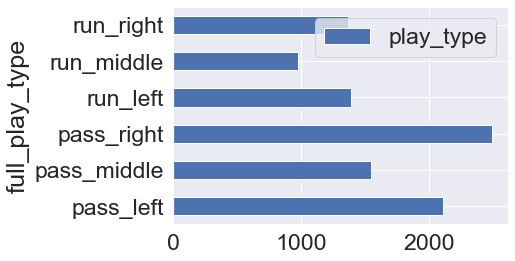

In [63]:
nedf.groupby(['full_play_type']).count()[['play_type']].plot(kind='barh')

In [64]:
nedf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100 * x / float(x.sum()))

,play_type
full_play_type,
pass_left,21.317947
pass_middle,15.649357
pass_right,25.225225
run_left,14.060128
run_middle,9.909910
run_right,13.837433


In [65]:
le = preprocessing.LabelEncoder()
le.fit(nedf.full_play_type)
nedf['full_play_type_code'] = le.transform(nedf['full_play_type'])

<AxesSubplot:ylabel='full_play_type_code'>

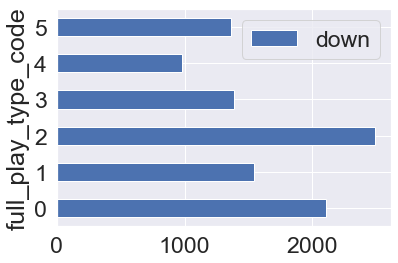

In [66]:
nedf.groupby(['full_play_type_code']).count()[['down']].plot(kind='barh')

In [67]:
def bucketize(val, size, count):
    i=0
    for i in range(count):
        if val <= (i+1)*size:
            return i
    return i
def bucketize_df(df):
    df['ydstogo'] = [bucketize(x, 4, 5) for x in df['ydstogo']]
    return df
nedf = bucketize_df(nedf)

In [68]:
nedf = pd.concat([nedf, pd.get_dummies(nedf['down'], prefix='down')], axis=1)
nedf = pd.concat([nedf, pd.get_dummies(nedf['ydstogo'], prefix='ydstogo')], axis=1)

In [69]:
nedf.describe()

,game_seconds_remaining,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,1738.748051,52.768094,1.787225,1.605223,2.171070,0.445490,0.336573,0.203158,0.014779,0.164996,0.180281,0.575767,0.042413,0.036542
std,1058.686142,24.347196,0.813977,0.934392,1.662105,0.497045,0.472561,0.402370,0.120673,0.371196,0.384441,0.494251,0.201540,0.187644
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,815.000000,35.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1808.000000,56.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2652.000000,73.000000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3600.000000,99.000000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
nedf['yardline_100']/=100

In [71]:
nedf.describe()

,game_seconds_remaining,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,1738.748051,0.527681,1.787225,1.605223,2.171070,0.445490,0.336573,0.203158,0.014779,0.164996,0.180281,0.575767,0.042413,0.036542
std,1058.686142,0.243472,0.813977,0.934392,1.662105,0.497045,0.472561,0.402370,0.120673,0.371196,0.384441,0.494251,0.201540,0.187644
min,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,815.000000,0.350000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1808.000000,0.560000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2652.000000,0.730000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3600.000000,0.990000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#select important columns for input
X=nedf[['yardline_100', 'down', 'ydstogo', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0','ydstogo_0','ydstogo_1','ydstogo_2','ydstogo_3','ydstogo_4']]
#select result column for output
Y=nedf['full_play_type_code']
#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [74]:
from sklearn.ensemble import RandomForestClassifier
the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
the_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=64)

In [75]:
from sklearn.metrics import accuracy_score, explained_variance_score
pred = the_clf.predict(test_x)
acc =accuracy_score(test_y, pred)
print(acc)

0.25425101214574897


In [76]:
eacc = explained_variance_score(test_y, pred)
print(eacc)

-0.3858154599851853


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, pred)
import matplotlib.pyplot as plt

In [78]:
from sklearn.metrics import classification_report
pred = the_clf.predict(test_x)
target_names = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
print(classification_report(test_y, pred, target_names=target_names))

              precision    recall  f1-score   support

   Pass Left       0.31      0.19      0.24       530
 Pass Middle       0.15      0.02      0.04       382
  Pass Right       0.26      0.63      0.37       637
    Run Left       0.25      0.14      0.18       353
  Run Middle       0.10      0.02      0.04       235
   Run Right       0.20      0.20      0.20       333

    accuracy                           0.25      2470
   macro avg       0.21      0.20      0.18      2470
weighted avg       0.23      0.25      0.21      2470



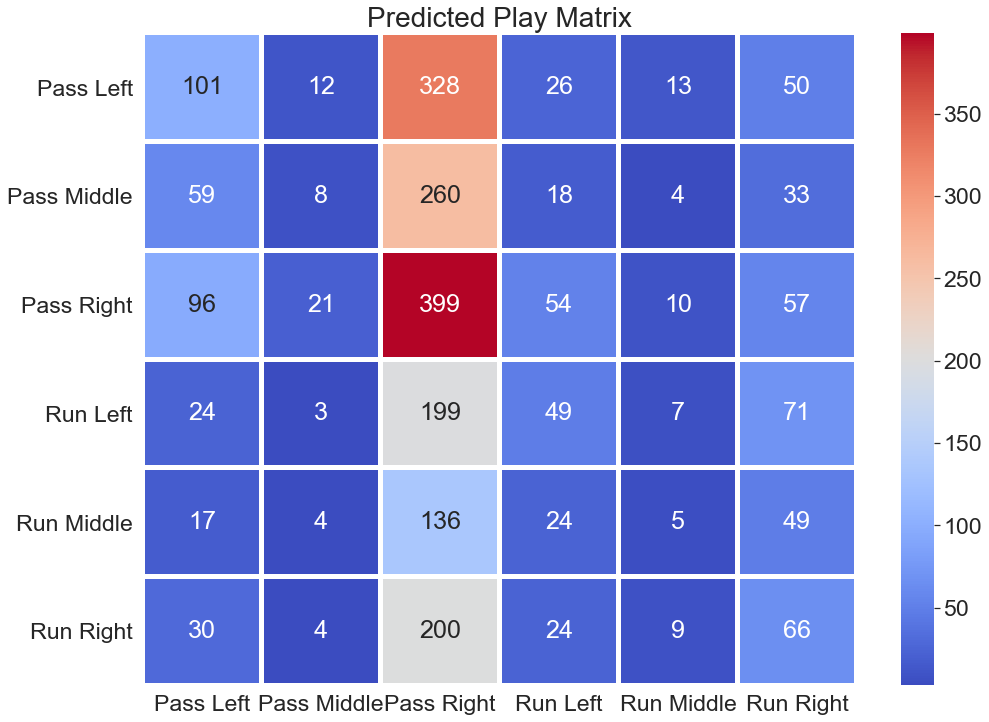

In [79]:
import seaborn as sns
plt.subplots(figsize=(16,12))
plt.title('Predicted Play Matrix', fontsize = 28) 
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
x_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
y_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
sns.set(font_scale=2.1)
gg = sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='coolwarm', annot=True, linewidths=4, fmt='g')